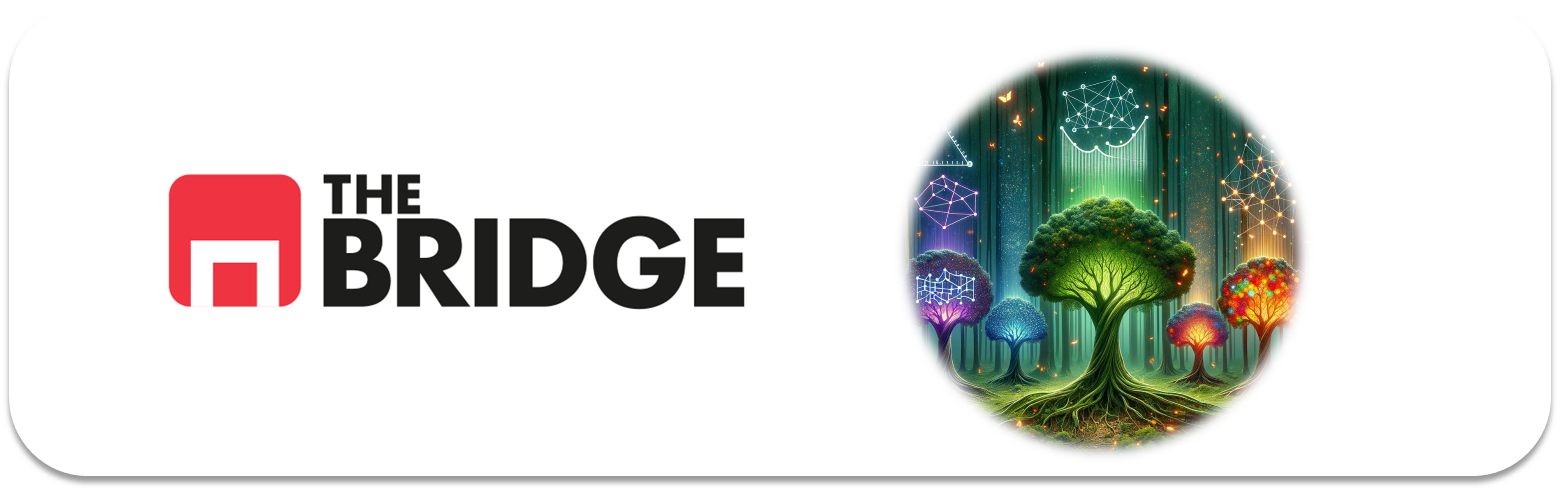

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [18]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [19]:
df = pd.read_csv(url,names = names)
df.to_csv("./data/diabetes.csv", index = False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [20]:
#Separación en train y test
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [21]:
#Definimos el target del estudio
target = "class"

In [22]:
df[target].value_counts(normalize= True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [23]:
#Separamos la variable target del resto del DataFrame

features = train_set.columns.to_list()
features.remove(target)
scaler = StandardScaler()
X_train = train_set[features]
y_train = train_set[target]
X_test = test_set[features]
y_test = test_set[target]

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features)



In [24]:
#Sacamos los modelos y elegimos los tres mejores:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

model_names = ["Logistic Regression", "DecisionTree", "Random Forest", "XGBoost", "LightGBM", "CatBoost"]

lr_clf = LogisticRegression(max_iter= 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state=42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]




In [25]:
#Comparación con validacion cruzada

metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre]= cross_val_score(modelo, X_train, y_train, cv= 3, scoring = "accuracy")
    else:
        metricas_cv[nombre]= cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))

ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)


In [26]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy _CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, Accuracy _CV: 0.7670492587278814
Model <DecisionTree>, Accuracy _CV: 0.7231149370317232
Model <Random Forest>, Accuracy _CV: 0.7719432488442531
Model <XGBoost>, Accuracy _CV: 0.7442770604176631
Model <LightGBM>, Accuracy _CV: 0.7377650247090707
Model <CatBoost>, Accuracy _CV: 0.7735931771082417
El ganador es CatBoost


Analizando la accuracy de los modelos, el mas eficiente es el CatBoost y los siguientes son
el Random Forest y el Logistic Regression




In [27]:
metricas_optimizadas = {}

In [28]:
#CatBoost con ajuste de RandomizedSearchCV

from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

cat_model = CatBoostClassifier(random_state=42)

param_dist_cat = {
    'iterations': [100,200,300],
    'depth': [4,6,8,10],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'l2_leaf_reg': [1,3,5,7,9],
    'border_count': [32,64,128]
}

random_search_cat = RandomizedSearchCV(
    estimator = cat_model,
    param_distributions= param_dist_cat,
    n_iter= 20,
    cv= 3,
    scoring='accuracy',
    n_jobs = -1,
    random_state=42
)

random_search_cat.fit(X_train, y_train)

print("Los mejores hiperparámetros encontrados para este modelo son:")
print(random_search_cat.best_params_)
metricas_optimizadas["CatBoost Model"] = random_search_cat.best_score_


0:	learn: 0.6879890	total: 53.2ms	remaining: 15.9s
0:	learn: 0.6889879	total: 53.2ms	remaining: 15.9s
1:	learn: 0.6823272	total: 54.6ms	remaining: 8.13s
1:	learn: 0.6813447	total: 54.8ms	remaining: 8.17s
0:	learn: 0.6683302	total: 55ms	remaining: 16.4s
1:	learn: 0.6316645	total: 55.7ms	remaining: 8.3s
2:	learn: 0.6767235	total: 56.1ms	remaining: 5.56s
2:	learn: 0.6046284	total: 56.9ms	remaining: 5.64s
3:	learn: 0.5819965	total: 57.7ms	remaining: 4.27s
2:	learn: 0.6758445	total: 57.9ms	remaining: 5.74s
3:	learn: 0.6716277	total: 57.8ms	remaining: 4.27s
4:	learn: 0.5618074	total: 59ms	remaining: 3.48s
3:	learn: 0.6699685	total: 59.4ms	remaining: 4.4s
0:	learn: 0.6871790	total: 55.9ms	remaining: 16.7s
4:	learn: 0.6672929	total: 59.3ms	remaining: 3.5s
5:	learn: 0.5452646	total: 59.8ms	remaining: 2.93s
1:	learn: 0.6811979	total: 57.6ms	remaining: 8.59s
6:	learn: 0.5309696	total: 60.9ms	remaining: 2.55s
4:	learn: 0.6645568	total: 61.1ms	remaining: 3.61s
5:	learn: 0.6621520	total: 61.7ms	rema

In [ ]:
#Random Forest optimizado con un Random Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt', 'log2', None]
}

random_search_rf = RandomizedSearchCV(
    estimator= rf_model,
    param_distributions= param_dist_rf,
    n_iter= 20,
    cv=3,
    scoring= 'accuracy',
    n_jobs= -1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)

print("Los mejores hiperparámetros encontrados para este modelo son:")
print(random_search_rf.best_params_)
metricas_optimizadas["RandomForest Model"] = random_search_rf.best_score_

Los mejores hiperparámetros encontrados para este modelo son:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [33]:
# Optimizacion con el modelo de Logistic Regression optimizado con un Random Search

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_model = LogisticRegression(max_iter= 10000, random_state= 42)

param_dist_log = {
    'C': [0.1, 0.5, 1],
    'penalty': ['l2', 'elasticnet'],
    'l1_ratio': np.linspace(0, 1, 10)
}

random_search_log = RandomizedSearchCV(
    estimator= log_model,
    param_distributions= param_dist_log,
    n_iter= 20,
    cv= 3,
    scoring= 'accuracy',
    n_jobs= -1,
    random_state= 42
)

random_search_log.fit(X_train_scaled, y_train)
print("Los mejores hiperparámetros encontrados para este modelo son:")
print(random_search_log.best_params_)
metricas_optimizadas["Logistic Regression Model"] = random_search_log.best_score_

/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

Los mejores hiperparámetros encontrados para este modelo son:
{'penalty': 'l2', 'l1_ratio': np.float64(0.8888888888888888), 'C': 0.5}


/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jorge/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

In [34]:
metricas_optimizadas

{'CatBoost Model': np.float64(0.7817152877411128),
 'RandomForest Model': np.float64(0.7849992029332058),
 'Logistic Regression Model': np.float64(0.768675274988044)}

Aqui podemos ver la accuracy que ha obtenido cada modelo optimizado


In [36]:
#Codigo para evaluar el test

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

mejor_catboost = random_search_cat.best_estimator_
mejor_rf = random_search_rf.best_estimator_
mejor_log = random_search_log.best_estimator_

#Predicciones

y_pred_cat = mejor_catboost.predict(X_test)
y_pred_rf = mejor_rf.predict(X_test)
y_pred_log = mejor_log.predict(X_test_scaled)

def evaluar_modelo(nombre, y_test, y_pred):
    print(f" Resultados para: {nombre}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))

evaluar_modelo("CatBoost", y_test, y_pred_cat)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("LogisticRegression", y_test, y_pred_log)

 Resultados para: CatBoost
Accuracy: 0.7727
Matriz de confusión:
[[81 18]
 [17 38]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

 Resultados para: Random Forest
Accuracy: 0.7597
Matriz de confusión:
[[80 19]
 [18 37]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

 Resultados para: LogisticRegression
Accuracy: 0.7532
Matriz de confusión:
[[79 20]
 [18 37]]
Reporte de clasificación:
 